<a href="https://colab.research.google.com/github/ajinkyajumde/imdbdata/blob/main/Copy_of_M1W3_Guided_Project_EDA_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



In [109]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
imdb=pd.read_csv('/content/drive/MyDrive/Almabetter projects/imdb data/imdb_data (1).csv')

In [112]:
imdb.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [113]:
imdb.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [114]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [115]:
imdb_new=imdb

In [116]:
imdb_new.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [117]:
imdb_new.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [118]:
imdb_new.loc[imdb_new['budget'] < 1000,'budget']=imdb_new.loc[imdb_new['budget'] >= 1000,'budget'].mean()
imdb_new.loc[imdb_new['revenue'] < 1000,'revenue']=imdb_new.loc[imdb_new['revenue'] >= 1000,'revenue'].mean()



In [119]:
imdb_new.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,3.114931e+07,8.463274,107.856571,6.801820e+07
std,866.169729,3.430294e+07,12.104000,22.086434,1.372184e+08
min,1.000000,2.500000e+03,0.000001,0.000000,1.404000e+03
25%,750.750000,1.000000e+07,4.018053,94.000000,2.947600e+06
50%,1500.500000,3.114931e+07,7.374861,104.000000,1.848102e+07
75%,2250.250000,3.114931e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [120]:
imdb_new['profit']=imdb_new['revenue']-imdb_new['budget']

In [121]:
maximum_profit=imdb_new['profit'].max()
maximum_profit

1316249360.0

In [122]:
max_prof=imdb_new[imdb_new['profit']==maximum_profit]
max_prof


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,profit
1761,1762,"[{'id': 9485, 'name': 'The Fast and the Furiou...",190000000.0,"[{'id': 28, 'name': 'Action'}]",http://www.furious7.com/,tt2820852,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,27.275687,...,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Vengeance Hits Home,Furious 7,"[{'id': 830, 'name': 'car race'}, {'id': 3428,...","[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",1.506249e+09,1.316249e+09


In [123]:
def conversion(str):
  return eval(str)
  

In [124]:
crew=eval(max_prof.loc[1761,'crew'])
crew

[{'credit_id': '52fe4cc8c3a36847f823e681',
  'department': 'Production',
  'gender': 2,
  'id': 12835,
  'job': 'Producer',
  'name': 'Vin Diesel',
  'profile_path': '/7rwSXluNWZAluYMOEWBxkPmckES.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e687',
  'department': 'Production',
  'gender': 2,
  'id': 11874,
  'job': 'Producer',
  'name': 'Neal H. Moritz',
  'profile_path': '/cNcsEYmoS4niCz3UkVAA09dUIob.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e68d',
  'department': 'Writing',
  'gender': 2,
  'id': 58191,
  'job': 'Writer',
  'name': 'Chris Morgan',
  'profile_path': '/dUGxIwFBLrSFLImxjeda1krndMO.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e693',
  'department': 'Writing',
  'gender': 0,
  'id': 8162,
  'job': 'Characters',
  'name': 'Gary Scott Thompson',
  'profile_path': '/e2dMfqFvRsOXgWZ1VToYLmos17y.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e699',
  'department': 'Directing',
  'gender': 2,
  'id': 2127,
  'job': 'Director',
  'name': 'James Wan',
  'profile_path': '/d1LSKfzi5J6QngW

In [125]:
dir=[]
prod=[]
for emp in crew:
  if emp['job']=='Director':
    dir_name=emp['name']
    dir.append(dir_name)
  if emp['job']=='Producer':
    prod_name=emp['name']
    prod.append(prod_name)
print(f' THE NAME OF THE DIRECTOR FOR THE MOVIE WITH MAXIMUM PROFIT IS {dir}')
print(f' THE NAMES OF THE PRODUCERS FOR THE MOVIE WITH MAXIMUM PROFIT IS {prod}')  


 THE NAME OF THE DIRECTOR FOR THE MOVIE WITH MAXIMUM PROFIT IS ['James Wan']
 THE NAMES OF THE PRODUCERS FOR THE MOVIE WITH MAXIMUM PROFIT IS ['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell']


In [126]:
cast=eval(max_prof.loc[1761,'crew'])
cast

[{'credit_id': '52fe4cc8c3a36847f823e681',
  'department': 'Production',
  'gender': 2,
  'id': 12835,
  'job': 'Producer',
  'name': 'Vin Diesel',
  'profile_path': '/7rwSXluNWZAluYMOEWBxkPmckES.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e687',
  'department': 'Production',
  'gender': 2,
  'id': 11874,
  'job': 'Producer',
  'name': 'Neal H. Moritz',
  'profile_path': '/cNcsEYmoS4niCz3UkVAA09dUIob.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e68d',
  'department': 'Writing',
  'gender': 2,
  'id': 58191,
  'job': 'Writer',
  'name': 'Chris Morgan',
  'profile_path': '/dUGxIwFBLrSFLImxjeda1krndMO.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e693',
  'department': 'Writing',
  'gender': 0,
  'id': 8162,
  'job': 'Characters',
  'name': 'Gary Scott Thompson',
  'profile_path': '/e2dMfqFvRsOXgWZ1VToYLmos17y.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e699',
  'department': 'Directing',
  'gender': 2,
  'id': 2127,
  'job': 'Director',
  'name': 'James Wan',
  'profile_path': '/d1LSKfzi5J6QngW

In [127]:
act=[]

for emp in cast:
  
    act_name=emp['name']
    act.append(act_name)

print(f' THE NAME OF THE ACTORS FOR THE MOVIE WITH MAXIMUM PROFIT IS {act}')

 THE NAME OF THE ACTORS FOR THE MOVIE WITH MAXIMUM PROFIT IS ['Vin Diesel', 'Neal H. Moritz', 'Chris Morgan', 'Gary Scott Thompson', 'James Wan', 'Stephen F. Windon', 'Tony Mecca', 'Marc Spicer', 'Samantha Vincent', 'F. Valentino Morales', 'Michael Fottrell', 'Brandon Birtell', 'Leigh Folsom Boyd', 'Dylan Highsmith', 'Kirk M. Morri', 'Christian Wagner', 'Anne McCarthy', 'Kellie Roy', 'Jonathan Carlos', 'Alan Hook', 'Jay Pelissier', 'Kelly Richardson', 'Courtney Cocherell', 'Elena Albanese', 'Alex McCarroll', 'Bruce Di Valerio', 'Bill Brzeski', 'Danielle Berman', 'Sanja Milkovic Hays', 'Nava R. Sadan', 'Andrew Hunt', 'Jim Alan Cook', 'Shayne Allen Duhon', 'Empress Holley', 'Marina Marit', 'Les Morgan', 'Linda D. Flowers', "Yesim 'Shimmy' Osman", 'Jennifer Santiago', 'Rachel Solow', 'Roxane Griffin', 'James MacKinnon', 'Autumn Butler', "Roxy D'Alonzo", 'Hee Soo Kwon', 'Sarah Mays', 'Paul Pattison', 'Eleanor Sabaduquia', 'Guillaume DeLouche', 'Douglas T. Madison', 'Igor Meglic', 'Jacques 

In [128]:
imd=imdb_new.groupby(['original_language']).sum('profit').reset_index()
columns=['original_language','budget','revenue','profit']
imd=imd[columns]
imd.sort_values(by='profit',ascending=False)

,original_language,budget,revenue,profit
7,en,8.539771e+10,1.951895e+11,1.097918e+11
35,zh,5.245065e+08,1.473187e+09,9.486805e+08
13,hi,4.378163e+08,1.268602e+09,8.307856e+08
17,ja,8.586569e+08,1.202135e+09,3.434779e+08
5,de,2.921469e+08,4.375743e+08,1.454274e+08
30,ta,2.000932e+08,3.033182e+08,1.032250e+08
32,tr,6.279862e+07,1.549902e+08,9.219161e+07
2,cn,5.112732e+08,5.954577e+08,8.418446e+07
28,sr,5.000000e+05,6.801820e+07,6.751820e+07
24,pl,7.359280e+06,3.002167e+07,2.266239e+07


In [129]:
imdn=imdb_new.groupby(['original_language']).mean('profit').reset_index()
columns=['original_language','budget','revenue','profit']
imdn=imd[columns]
imdn.sort_values(by='profit',ascending=False)

,original_language,budget,revenue,profit
7,en,8.539771e+10,1.951895e+11,1.097918e+11
35,zh,5.245065e+08,1.473187e+09,9.486805e+08
13,hi,4.378163e+08,1.268602e+09,8.307856e+08
17,ja,8.586569e+08,1.202135e+09,3.434779e+08
5,de,2.921469e+08,4.375743e+08,1.454274e+08
30,ta,2.000932e+08,3.033182e+08,1.032250e+08
32,tr,6.279862e+07,1.549902e+08,9.219161e+07
2,cn,5.112732e+08,5.954577e+08,8.418446e+07
28,sr,5.000000e+05,6.801820e+07,6.751820e+07
24,pl,7.359280e+06,3.002167e+07,2.266239e+07


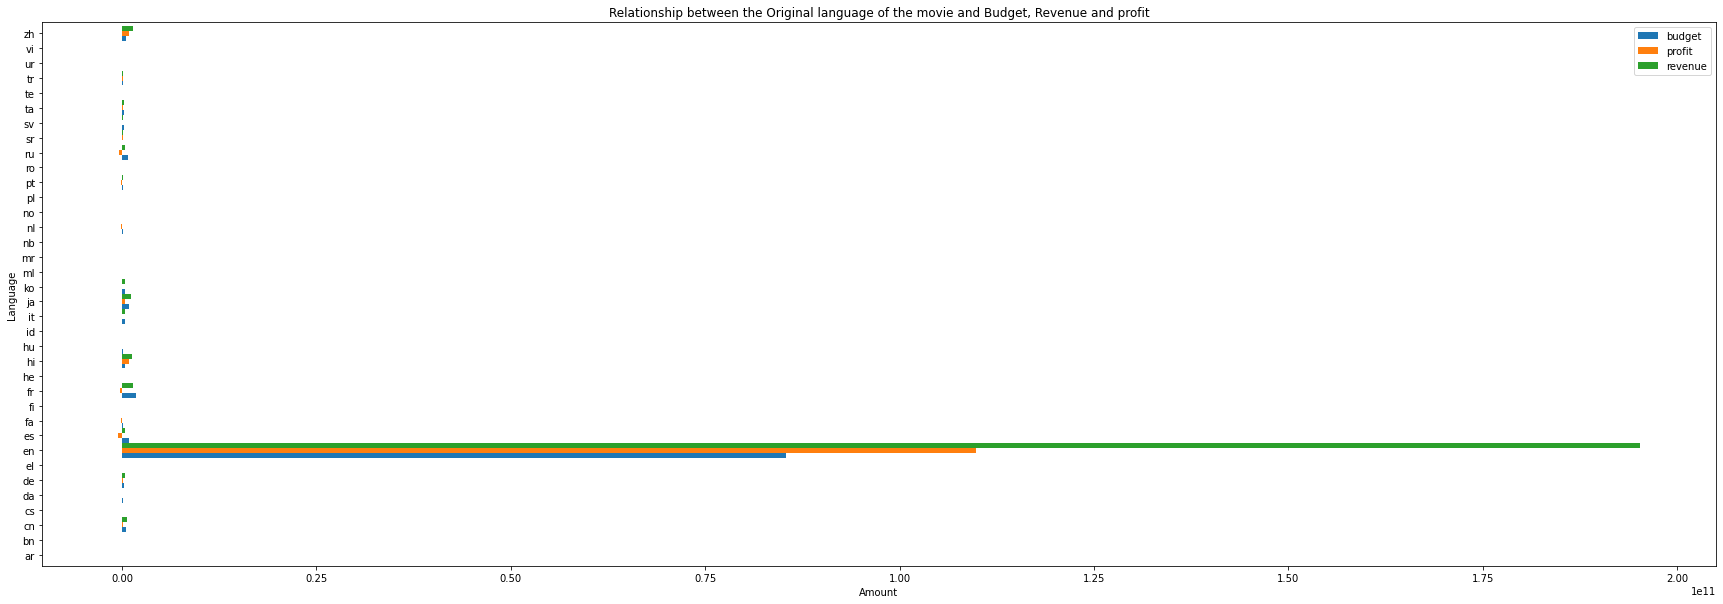

In [130]:

imdn.plot.barh(x="original_language", y=["budget","profit","revenue"],figsize=(30, 10),width=1)

plt.title('Relationship between the Original language of the movie and Budget, Revenue and profit')
plt.ylabel('Language')
plt.xlabel('Amount')
plt.show()

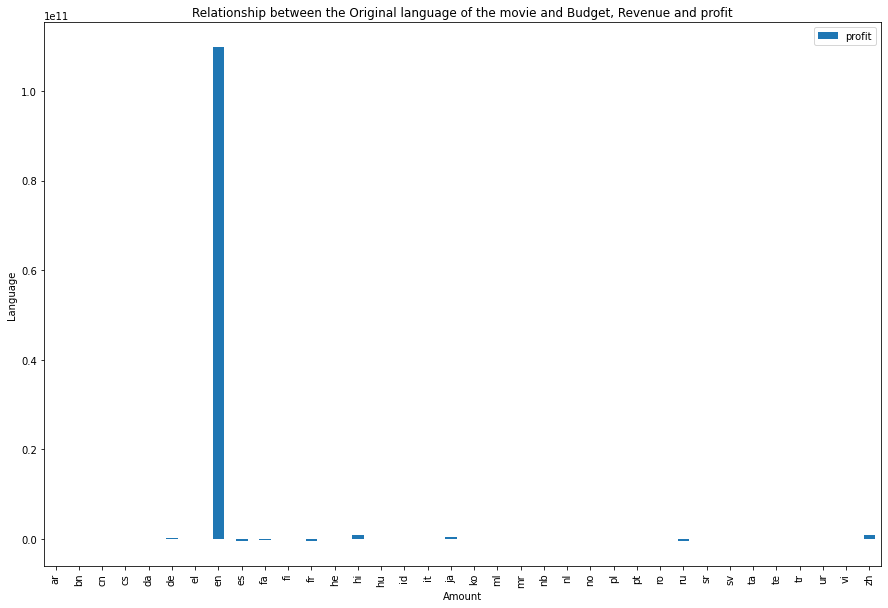

In [131]:
imdn.plot.bar(x="original_language", y=["profit"],figsize=(15, 10))

plt.title('Relationship between the Original language of the movie and Budget, Revenue and profit')
plt.ylabel('Language')
plt.xlabel('Amount')
plt.show()

In [132]:
imdb_new.shape

(3000, 24)

In [133]:
airbnb['price_category']=airbnb.apply((lambda x: 'cheap' if x['price']<=80 else 'affordable' if x['price']>=80 and x['price']<=500 else 'Expensive' ),axis=1)

NameError: ignored